# <center>FINAL ASSIGNMENT</center>

## Dataset: Wastewater Treatment Plant Dataset 


The objective is to build a machine learning model that predicts whether the wastewater treatment process is operating optimally based on daily measurements of the plant's operational data.

Task :
1.	Data Preprocessing: 
Perform comprehensive data preprocessing, including handling missing values, scaling, and feature selection, while visualizing key trends and correlations to enhance data insights and model performance.
2.	Modeling with Machine Learning Algorithms:
Apply various machine learning algorithms to classify the operational state of the wastewater treatment process. Use the following algorithms:
o	Logistic Regression from scratch as well as from sklearn
o	K-Nearest Neighbours (KNN)
o	Decision Tree Classifier
o	Random Forest Classifier
o	Support Vector Machine (SVM)
o	Any other relevant algorithms you feel might improve performance.
3.	Model Evaluation:
Evaluate and compare models using accuracy, F1-score, and confusion matrix, and perform hyperparameter tuning to optimize performance on the test dataset.
Note : With the given link for dataset, it will redirect you to Kaggle website from there download this dataset. It is a zip file containing two datasets you must use Data-Melbourne_F_fixed csv file and ignore the other csv file and make a little change in first row it is starting with comma so before that you must write serial No then save changes and use the updated dataset.


## 1.	Data Preprocessing: 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [5]:
data_path = "Data-Melbourne_F_fixed.csv"
df = pd.read_csv(data_path)
print(df.head())

print(df.shape)

df = df.drop(df.columns[0], axis=1)
df.describe()



   Unnamed: 0  Average Outflow  Average Inflow  Energy Consumption  Ammonia  \
0           0            2.941           2.589              175856     27.0   
1           1            2.936           2.961              181624     25.0   
2           2            2.928           3.225              202016     42.0   
3           3            2.928           3.354              207547     36.0   
4           4            2.917           3.794              202824     46.0   

   Biological Oxygen Demand  Chemical Oxygen Demand  Total Nitrogen  \
0                     365.0                   730.0          60.378   
1                     370.0                   740.0          60.026   
2                     418.0                   836.0          64.522   
3                     430.0                   850.0          63.000   
4                     508.0                  1016.0          65.590   

   Average Temperature  Maximum temperature  Minimum temperature  \
0                 19.3        

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000


In [6]:
nan_values = df.isnull().sum()
print(nan_values)




Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64


There are no NAN values

In [7]:


print(df.dtypes)
df.head()
df.describe()

df.columns = [col.strip() for col in df.columns]

df.head()


Average Outflow             float64
Average Inflow              float64
Energy Consumption            int64
Ammonia                     float64
Biological Oxygen Demand    float64
Chemical Oxygen Demand      float64
Total Nitrogen              float64
Average Temperature         float64
Maximum temperature         float64
Minimum temperature         float64
Atmospheric pressure        float64
Average humidity              int64
Total rainfall              float64
Average visibility          float64
Average wind speed          float64
Maximum wind speed          float64
Year                          int64
Month                         int64
Day                           int64
dtype: object


,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7


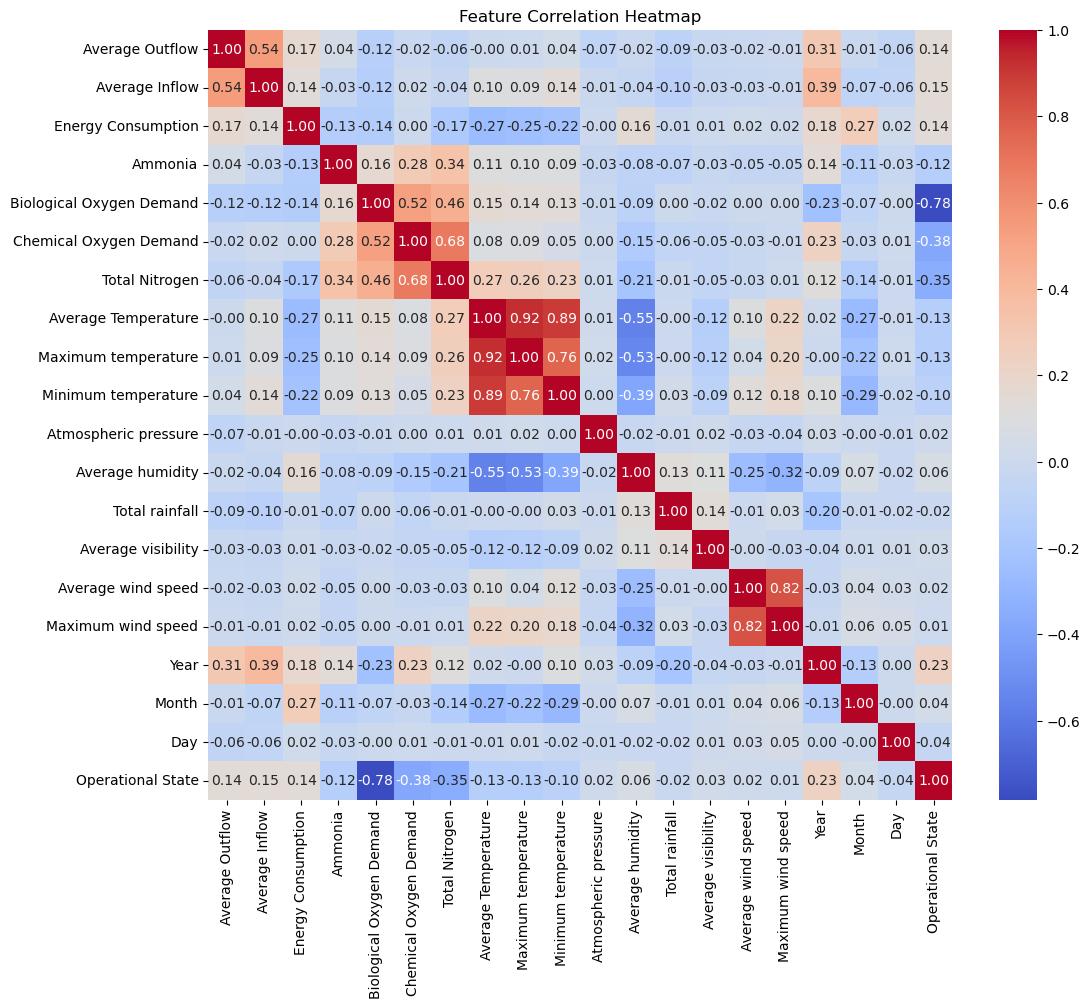

In [160]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [161]:
df['Operational State'] = (df['Biological Oxygen Demand'] <= 400).astype(int)


X = df.drop(columns=['Operational State', 'Biological Oxygen Demand', 'Day', 'Month', 'Year', 'Average visibility', 'Atmospheric pressure', 'Average wind speed', 'Maximum wind speed', 'Total rainfall', 'Average Outflow', 'Average Inflow', 'Average humidity', 'Ammonia', 'Maximum temperature' , 'Minimum temperature', 'Average Temperature'])
y = df['Operational State']

X.head()

,Energy Consumption,Chemical Oxygen Demand,Total Nitrogen
0,175856,730.0,60.378
1,181624,740.0,60.026
2,202016,836.0,64.522
3,207547,850.0,63.000
4,202824,1016.0,65.590


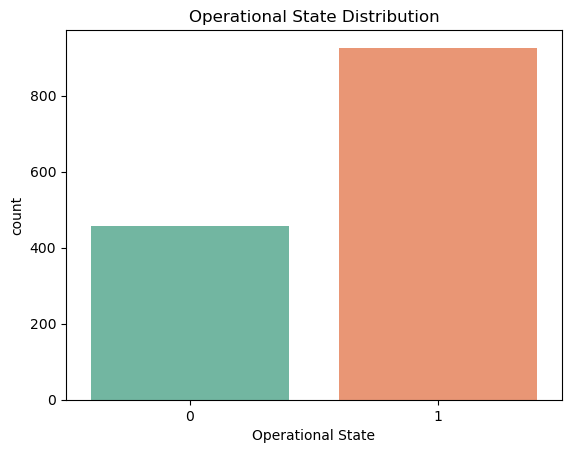

In [162]:
sns.countplot(x='Operational State', data=df, palette='Set2')
plt.title("Operational State Distribution")
plt.show()

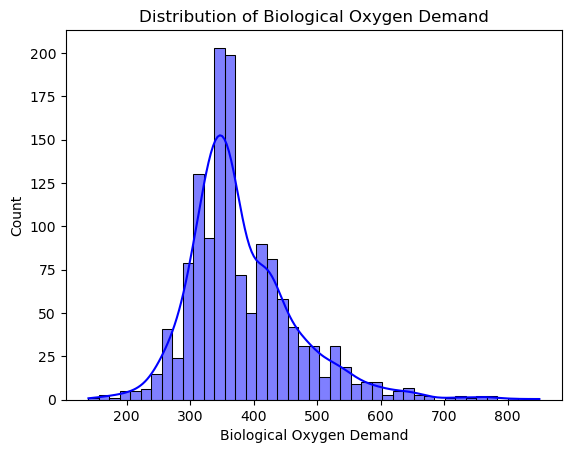

In [163]:
sns.histplot(df['Biological Oxygen Demand'], kde=True, color='blue')
plt.title("Distribution of Biological Oxygen Demand")
plt.xlabel("Biological Oxygen Demand")
plt.show()

In [143]:
X_train,X_test,y_train, y_test = train_test_split(X,  y,test_size=0.2, random_state=42,stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, it=1000):
        self.lr = lr
        self.it = it

    def sigmoid(self, z):
        return 1 / (1 + np.exp( -z))

    
    def fit(self, X, y):
        self.m,  self.n = X.shape
        self.weights =  np.zeros(self.n)
        self.bias = 0
        

        for _ in range(self.it):
            linear_model = np.dot(X, self.weights) + self.bias
            pred = self.sigmoid(linear_model)

            dw = (1 / self.m) * np.dot(X.T, (pred - y))
            db = (1 / self.m) * np.sum(pred - y)

            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        pred = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in pred]
    
    
    
log_reg_scratch = LogisticRegressionScratch(lr=0.01, it=1000)
log_reg_scratch.fit(X_train_scaled, y_train.values)
y_pred_lr_scratch = log_reg_scratch.predict(X_test_scaled)

print("\nLogistic Regression (Scratch):")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_lr_scratch):.2f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_lr_scratch):.2f}")
print(f"  Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lr_scratch)}")



Logistic Regression (Scratch):
  Accuracy: {accuracy_score(y_test, y_pred_lr_scratch):.2f}
  F1 Score: {f1_score(y_test, y_pred_lr_scratch):.2f}
  Confusion Matrix:
{confusion_matrix(y_test, y_pred_lr_scratch)}


In [155]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression(sklearn):")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_lr):.2f}")
print(f"  Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lr)}")

Logistic Regression(sklearn):
  Accuracy: 0.73
  F1 Score: 0.82
  Confusion Matrix:
[[ 34  57]
 [ 17 169]]


In [156]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("\n K-Nearest Neighbors:")
print(f" Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_knn):.2f}")
print(f"  Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")


 K-Nearest Neighbors:
 Accuracy: 0.69
  F1 Score: 0.77
  Confusion Matrix:
[[ 48  43]
 [ 44 142]]


In [157]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)


print("\nDecision Tree:")
print(f" Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_dt):.2f}")
print(f"  Confusion Matrix:\n{confusion_matrix(y_test, y_pred_dt)}")



Decision Tree:
 Accuracy: 0.74
  F1 Score: 0.81
  Confusion Matrix:
[[ 51  40]
 [ 33 153]]


In [158]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("\nRandom Forest:")
print(f" Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"  Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")


Random Forest:
 Accuracy: 0.74
  F1 Score: 0.81
  Confusion Matrix:
[[ 53  38]
 [ 33 153]]


In [159]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)


print("\n Support Vector Machine:")
print(f" Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_svm):.2f}")
print(f"  Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}")


 Support Vector Machine:
 Accuracy: 0.73
  F1 Score: 0.81
  Confusion Matrix:
[[ 47  44]
 [ 30 156]]
